In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def f(t1, t2):
    return np.sqrt(t1**2 + t2**2)

In [12]:
def pdfx(t1, t2):
    grad_t1 = t1 / np.sqrt(t1**2 + t2**2 + 1e-8)  # Adding small value to avoid division by zero
    return grad_t1


In [11]:
def pdfy(t1, t2):
    grad_t2 = t2 / np.sqrt(t1**2 + t2**2 + 1e-8)
    return grad_t2


In [18]:
t1 = np.linspace(-1, 1, 100)
t2 = np.linspace(-1, 1, 100)
t1, t2 = np.meshgrid(t1, t2)
Z = f(T1, T2)

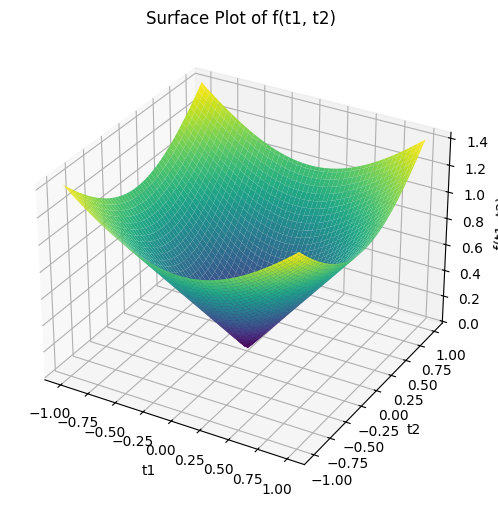

In [19]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T1, T2, Z, cmap='viridis')
ax.set_xlabel('t1')
ax.set_ylabel('t2')
ax.set_zlabel('f(t1, t2)')
ax.set_title('Surface Plot of f(t1, t2)')
plt.show()

Yes, it is convex

In [65]:
def gradient_descent(learning_rate, max_iter=5000, precision=1e-6,initial_t1=1.8,initial_t2=1.5):
    t1_old, t2_old = initial_t1,initial_t2
    t1_list = []
    t2_list =[]
    cost_list = []  

    
    for i in range(1, max_iter + 1):
        t1_new = t1_old - learning_rate * pdfx(t1_old, t2_old)
        t2_new = t2_old - learning_rate * pdfy(t1_old, t2_old)
        cost = f(t1_new, t2_new)  # Compute cost
        cost_list.append(cost)  

        t1_list.append(t1_old)
        t2_list.append(t2_old)

        
        if abs(f(t1_new, t2_new) - f(t1_old, t2_old)) < precision:
            break
        
        t1_old, t2_old = t1_new, t2_new
    
    return cost_list, i,t1_list, t2_list


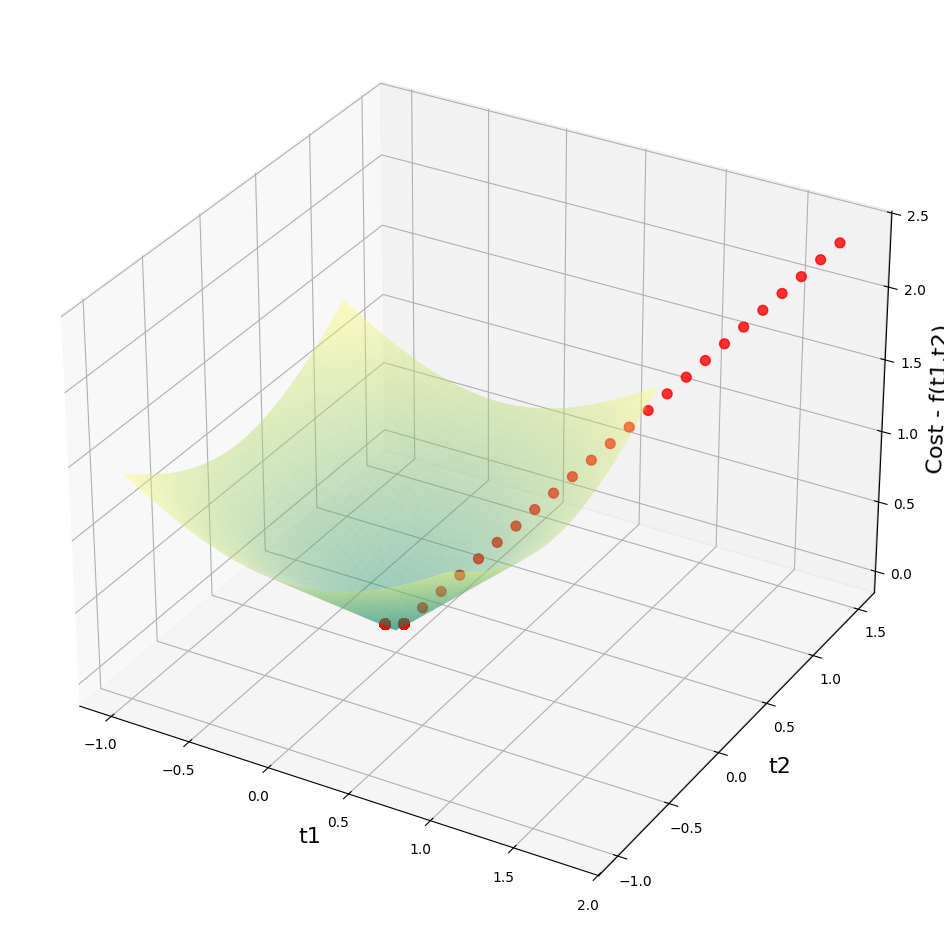

In [60]:
learning_rate = 0.1
_,_,t1_list, t2_list = gradient_descent(learning_rate)

# Plotting the 3D graph
fig = plt.figure(figsize=[16, 12])
ax = plt.axes(projection='3d')
ax.set_xlabel('t1', fontsize=16)
ax.set_ylabel('t2', fontsize=16)
ax.set_zlabel('Cost - f(t1,t2)', fontsize=16)

t1 = np.linspace(-1, 1, 100)
t2 = np.linspace(-1, 1, 100)
T1, T2 = np.meshgrid(t1, t2)
Z = f(T1, T2)
ax.plot_surface(T1, T2, Z, alpha=0.4, cmap='summer')


t1_list = np.array(t1_list)
t2_list = np.array(t2_list)
ax.scatter(t1_list, t2_list, f(t1_list, t2_list), alpha=0.8, s=50, color='red')

plt.show()


The algorithm is exceeding the most converged point, may be by reducing the step size we can make the convergence even better 

What if we reduce learning rate to 0.01

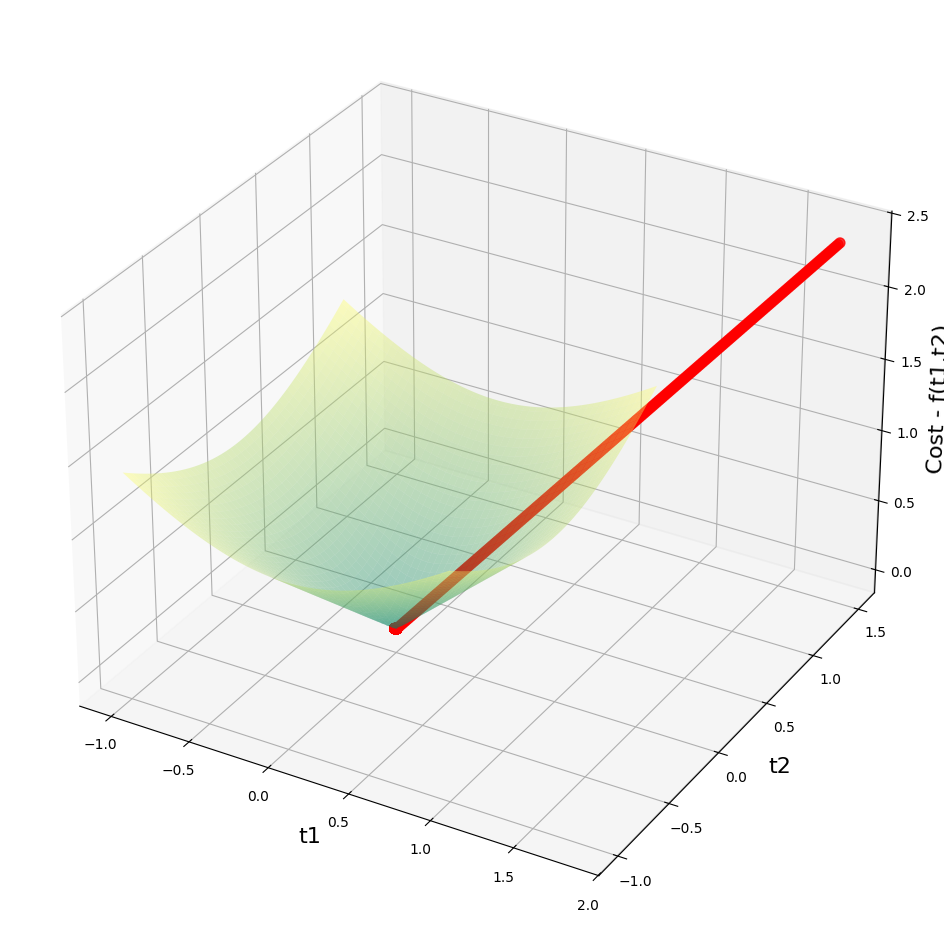

In [62]:
learning_rate = 0.01
_,_,t1_list, t2_list = gradient_descent(learning_rate)

# Plotting the 3D graph
fig = plt.figure(figsize=[16, 12])
ax = plt.axes(projection='3d')
ax.set_xlabel('t1', fontsize=16)
ax.set_ylabel('t2', fontsize=16)
ax.set_zlabel('Cost - f(t1,t2)', fontsize=16)

t1 = np.linspace(-1, 1, 100)
t2 = np.linspace(-1, 1, 100)
T1, T2 = np.meshgrid(t1, t2)
Z = f(T1, T2)
ax.plot_surface(T1, T2, Z, alpha=0.4, cmap='summer')


t1_list = np.array(t1_list)
t2_list = np.array(t2_list)
ax.scatter(t1_list, t2_list, f(t1_list, t2_list), alpha=0.8, s=50, color='red')

plt.show()


Looks converged!

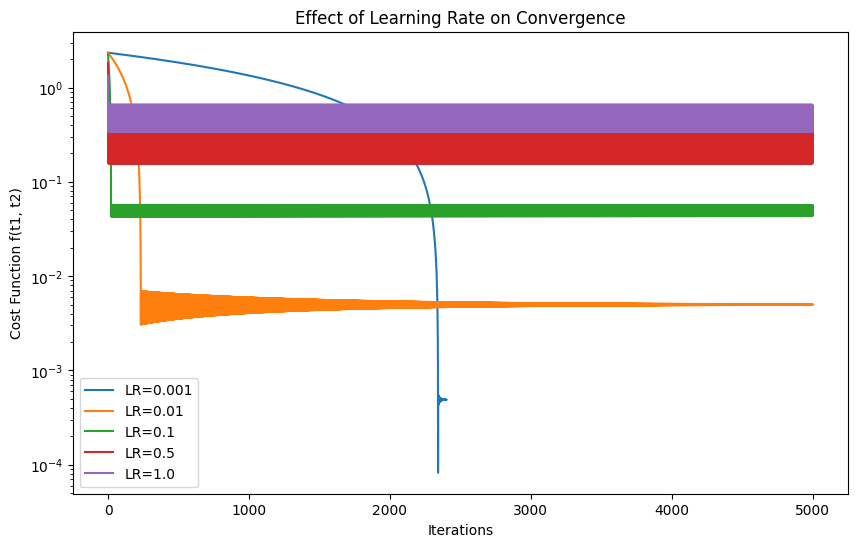

In [67]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
plt.figure(figsize=(10, 6))

for i in learning_rates:
    costs, iterations,_,_ = gradient_descent(i)
    plt.plot(range(len(costs)), costs, label=f'LR={i}')

plt.xlabel('Iterations')
plt.ylabel('Cost Function f(t1, t2)')
plt.yscale('log')  # Log scale to handle different magnitudes

plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.show()